In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/Spotify_data.csv')
df.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [4]:
#here, we will check if the dataset has duplicate or null values

print("Duplicate rows: \n", df.duplicated().sum())
print("Null Values: \n", df.isnull().sum())

Duplicate rows: 
 0
Null Values: 
 danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64


In [5]:
df.shape

(195, 14)

/var/folders/by/t0ff8bfj75j9v_3003xq_y0h0000gn/T/ipykernel_48427/42783238.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


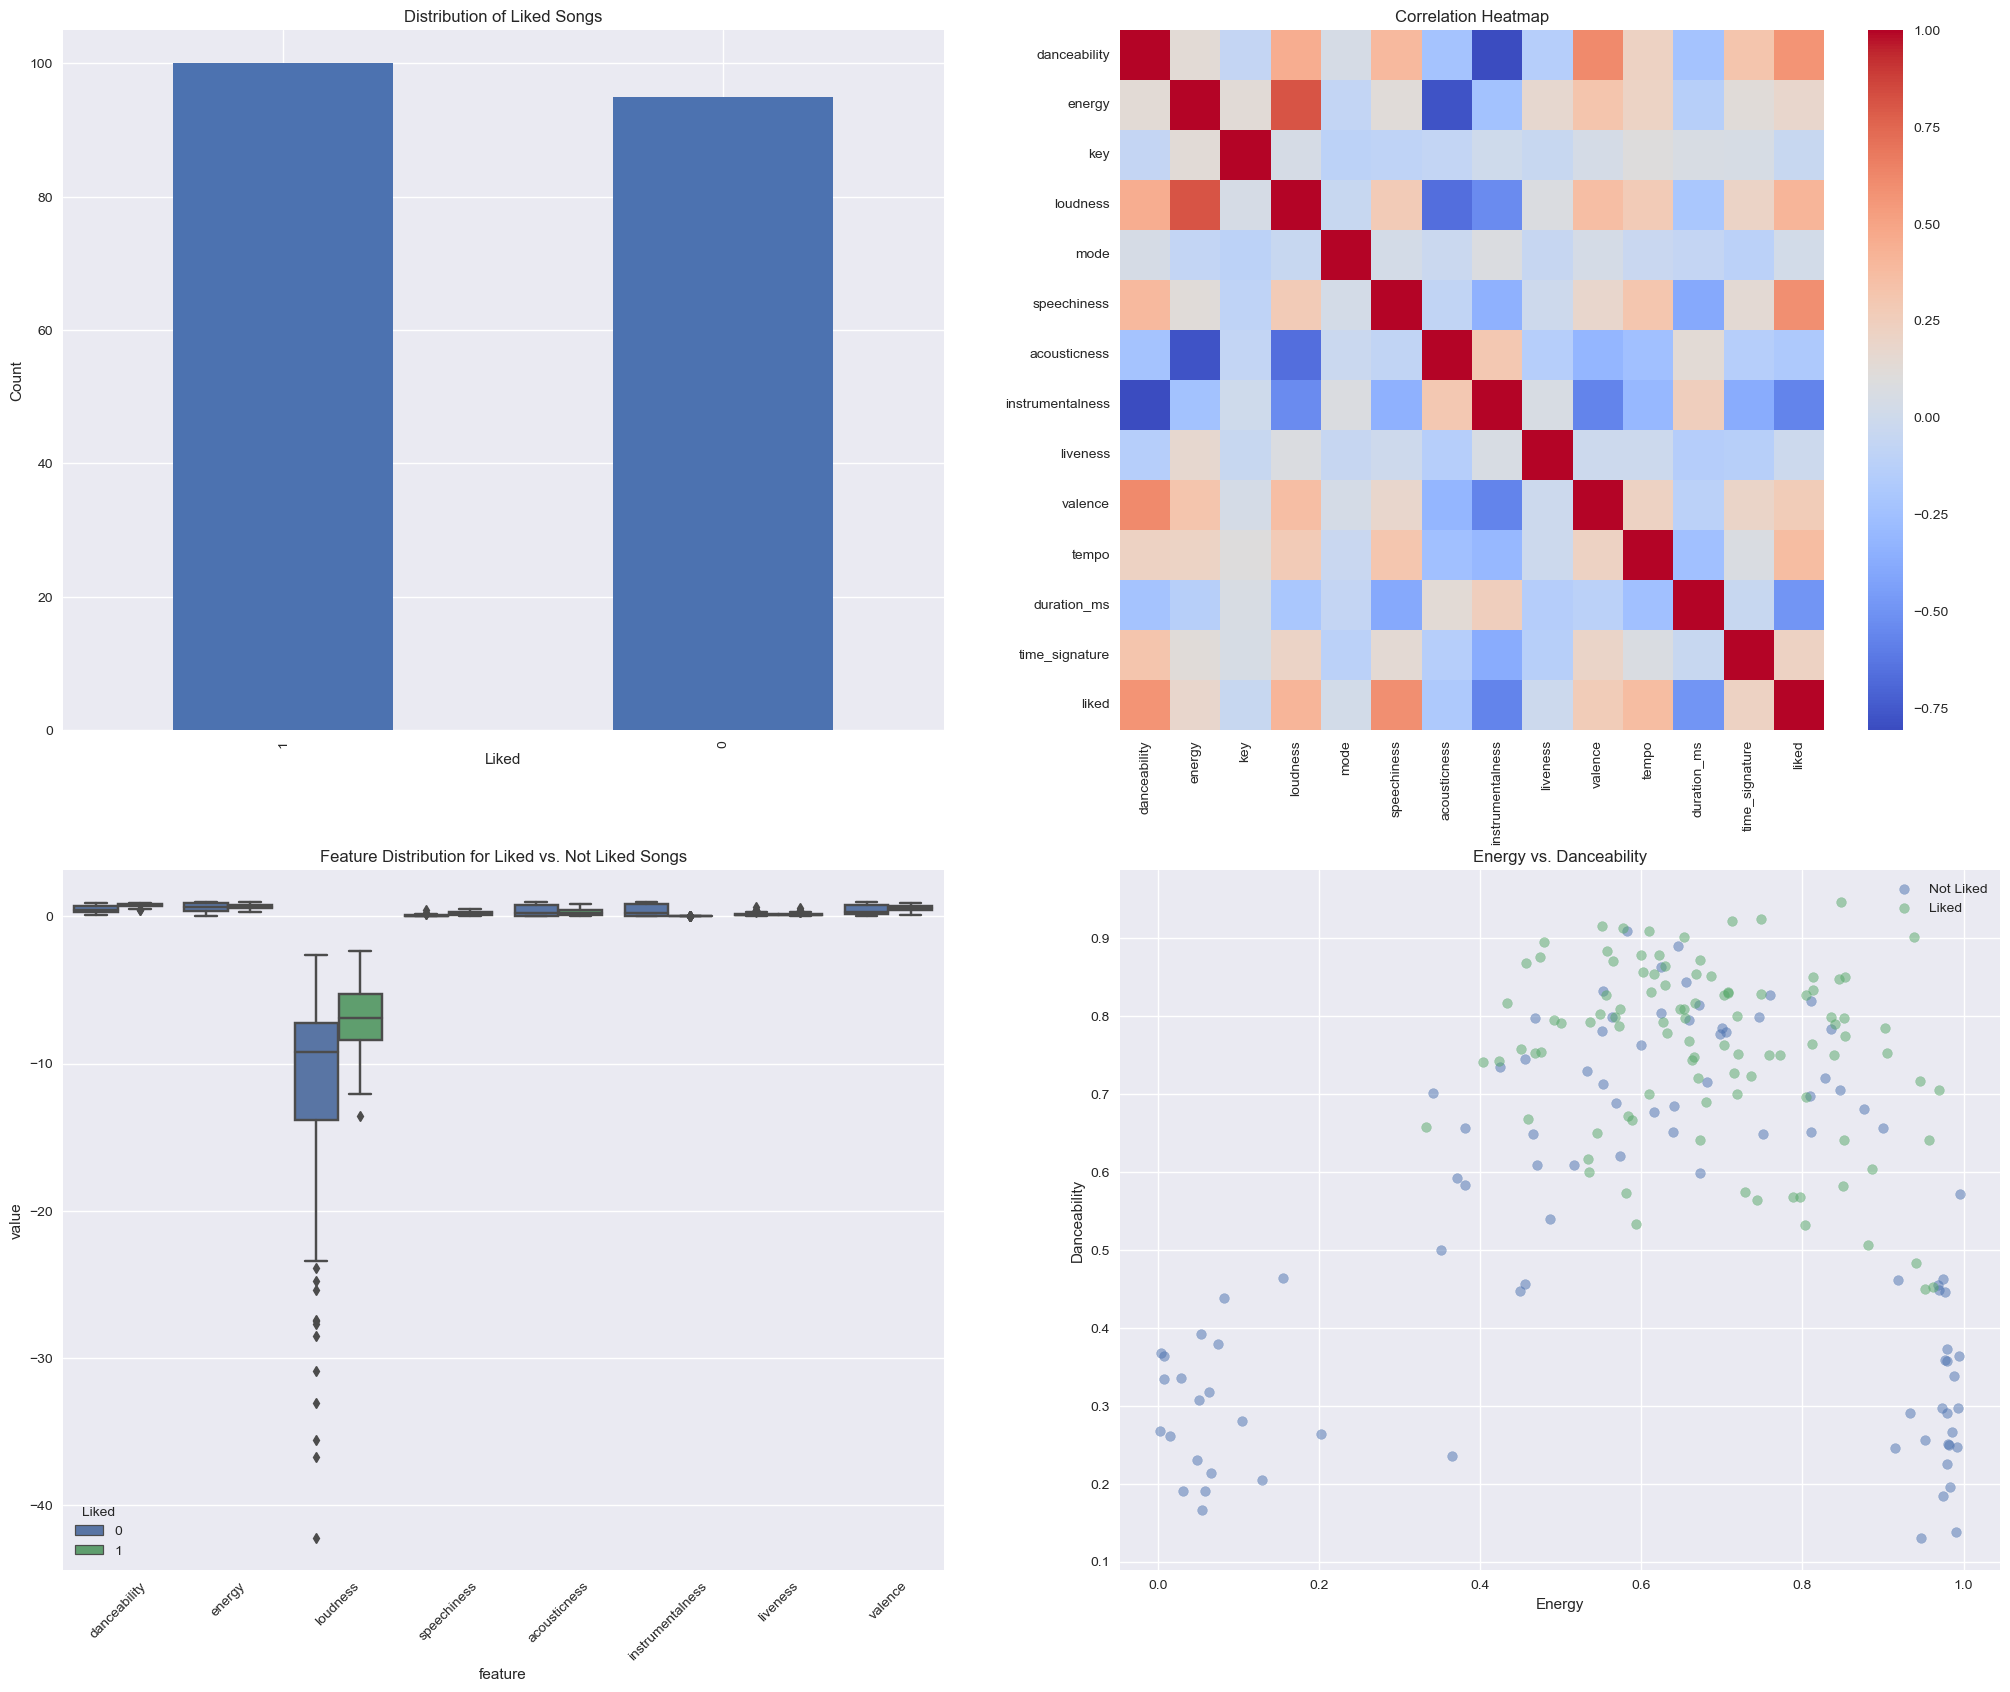

In [6]:
#after making sure that we do not have any duplicate values or null values
#we move on to the next phase which is - exploratory data analysis

plt.style.use('seaborn')
plt.figure(figsize=(25, 20))

plt.subplot(2, 2, 1)
df['liked'].value_counts().plot(kind='bar')
plt.title('Distribution of Liked Songs')
plt.xlabel('Liked')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')

features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
plt.subplot(2, 2, 3)
df_melted = df.melt(id_vars=['liked'], value_vars=features, var_name='feature', value_name='value')
sns.boxplot(x='feature', y='value', hue='liked', data=df_melted)
plt.title('Feature Distribution for Liked vs. Not Liked Songs')
plt.xticks(rotation=45)
plt.legend(title='Liked')

plt.subplot(2, 2, 4)
plt.scatter(df[df['liked'] == 0]['energy'], df[df['liked'] == 0]['danceability'], alpha=0.5, label='Not Liked')
plt.scatter(df[df['liked'] == 1]['energy'], df[df['liked'] == 1]['danceability'], alpha=0.5, label='Liked')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.title('Energy vs. Danceability')
plt.legend()

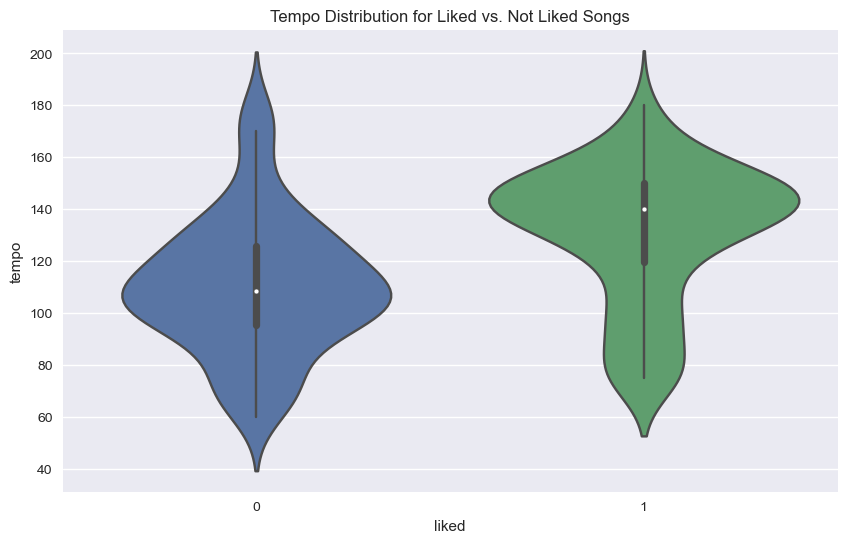

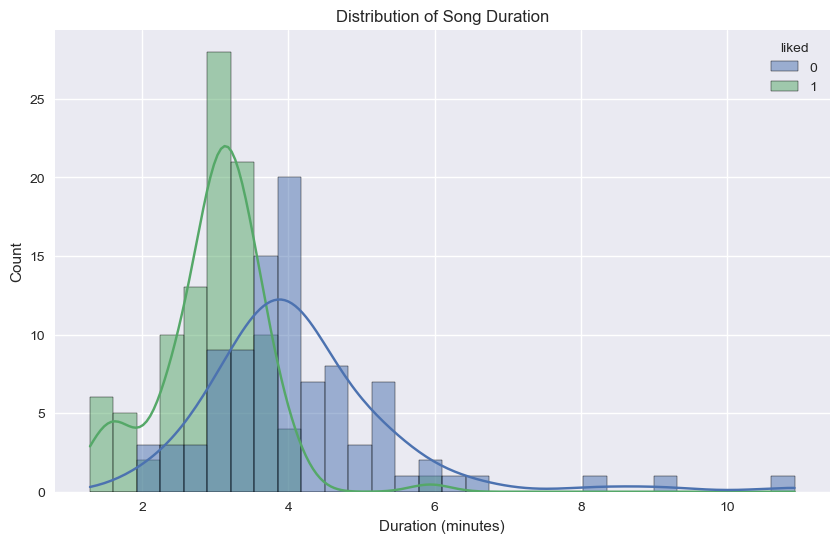

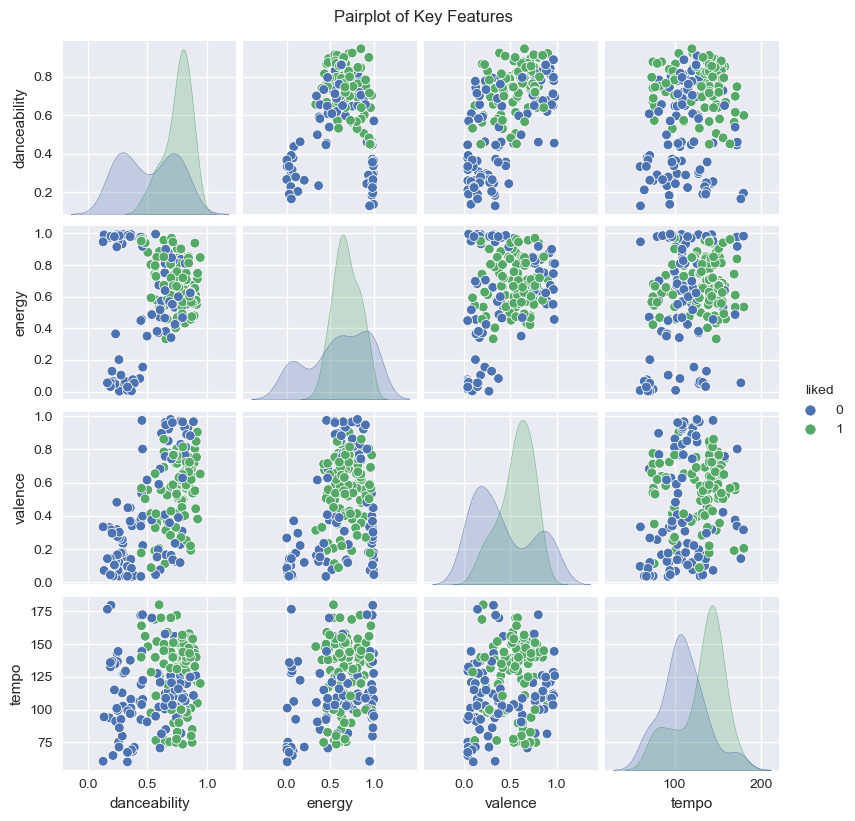

In [7]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='liked', y='tempo', data=df)
plt.title('Tempo Distribution for Liked vs. Not Liked Songs')
plt.show()

plt.figure(figsize=(10, 6))
df['duration_minutes'] = df['duration_ms'] / 60000  # Convert to minutes
sns.histplot(data=df, x='duration_minutes', hue='liked', kde=True, bins=30)
plt.title('Distribution of Song Duration')
plt.xlabel('Duration (minutes)')
plt.show()

sns.pairplot(df[['danceability', 'energy', 'valence', 'tempo', 'liked']], hue='liked', height=2)
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

In [8]:
X = df.drop(['liked'], axis=1)
y = df['liked']

#normalizing the features
X = (X - X.mean()) / X.std()

#adding a bias term
X['bias'] = 1

#splitting data into train and test sets using random seed
np.random.seed(42)
mask = np.random.rand(len(X)) < 0.8
X_train, X_test = X[mask], X[~mask]
y_train, y_test = y[mask], y[~mask]

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    def initialize_parameters(self, num_features):
        self.weights = np.zeros(num_features)
        self.bias = 0
    
    def compute_linear_predictor(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def compute_cost(self, h, y):
        m = len(y)
        cost = (-1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
        return cost
    
    def compute_gradients(self, X, h, y):
        m = len(y)
        dw = (1/m) * np.dot(X.T, (h - y))
        db = (1/m) * np.sum(h - y)
        return dw, db
    
    def update_parameters(self, dw, db):
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.initialize_parameters(num_features)
        
        for i in range(self.num_iterations):
            # Forward propagation
            z = self.compute_linear_predictor(X)
            h = sigmoid(z)
            
            # Compute cost
            cost = self.compute_cost(h, y)
            
            # Backward propagation
            dw, db = self.compute_gradients(X, h, y)
            
            # Update parameters
            self.update_parameters(dw, db)
            
            # Print cost every 100 iterations
            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")
    
    def predict_proba(self, X):
        z = self.compute_linear_predictor(X)
        return sigmoid(z)
    
    def predict(self, X):
        probas = self.predict_proba(X)
        return (probas >= 0.5).astype(int)
    
    def score(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy

In [10]:
lr_model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
lr_model.fit(X_train, y_train)

train_accuracy_lr = lr_model.score(X_train, y_train)
test_accuracy_lr = lr_model.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy_lr}")
print(f"Test Accuracy: {test_accuracy_lr}")

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.4387800971368683
Cost after iteration 200: 0.3647812495537199
Cost after iteration 300: 0.3279153176169128
Cost after iteration 400: 0.3049328079248597
Cost after iteration 500: 0.2887935933621867
Cost after iteration 600: 0.27661447919731913
Cost after iteration 700: 0.26697835280990345
Cost after iteration 800: 0.25909720254526275
Cost after iteration 900: 0.2524921508028893
Train Accuracy: 0.9225806451612903
Test Accuracy: 0.9


In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, num_iterations=1000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        
        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size) / np.sqrt(self.input_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) / np.sqrt(self.hidden_size)
        self.b2 = np.zeros((1, self.output_size))
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2
    
    def backward(self, X, y, output):
        m = X.shape[0]
        
        dz2 = output - y
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        dz1 = np.dot(dz2, self.W2.T) * (self.a1 * (1 - self.a1))
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
    
    def fit(self, X, y):
        # Convert to numpy arrays if pandas objects
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values.reshape(-1, 1)
        elif y.ndim == 1:
            y = y.reshape(-1, 1)
        
        for _ in range(self.num_iterations):
            output = self.forward(X)
            self.backward(X, y, output)
            
            if _ % 100 == 0:
                loss = -np.mean(y * np.log(output) + (1 - y) * np.log(1 - output))
                print(f"Iteration {_}, Loss: {loss}")
    
    def predict(self, X):
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X = X.values
        return (self.forward(X) >= 0.5).astype(int)
    
    def score(self, X, y):
        predictions = self.predict(X)
        if isinstance(y, pd.Series):
            y = y.values
        return np.mean(predictions == y)

In [12]:
input_size = X_train.shape[1]
hidden_size = 10  # You can adjust this
output_size = 1  # For binary classification

model_snn = SimpleNeuralNetwork(input_size, hidden_size, output_size, learning_rate=0.1, num_iterations=1000)
model_snn.fit(X_train, y_train)

train_accuracy_snn = model_snn.score(X_train, y_train)
test_accuracy_snn = model_snn.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy_snn}")
print(f"Test Accuracy: {test_accuracy_snn}")

Iteration 0, Loss: 0.7135319158892073
Iteration 100, Loss: 0.47515249772818635
Iteration 200, Loss: 0.31565230848391806
Iteration 300, Loss: 0.2524052444720304
Iteration 400, Loss: 0.22118066641390383
Iteration 500, Loss: 0.20272052518030984
Iteration 600, Loss: 0.19075415552993624
Iteration 700, Loss: 0.1824215409592946
Iteration 800, Loss: 0.17621064308852347
Iteration 900, Loss: 0.17128388349707688
Train Accuracy: 0.5001040582726327
Test Accuracy: 0.5075


In [13]:
class NaiveBayesClassifier:
    def __init__(self, epsilon=1e-9):
        self.classes = None
        self.mean = None
        self.var = None
        self.priors = None
        self.epsilon = epsilon  # Smoothing factor

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values

        self.classes = np.unique(y)
        n_features = X.shape[1]
        n_classes = len(self.classes)

        # Initialize mean, variance, and priors
        self.mean = np.zeros((n_classes, n_features))
        self.var = np.zeros((n_classes, n_features))
        self.priors = np.zeros(n_classes)

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0) + self.epsilon  # Add smoothing to variance
            self.priors[idx] = X_c.shape[0] / X.shape[0]

    def _calculate_likelihood(self, X):
        likelihoods = []
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            likelihood = np.sum(self._log_pdf(idx, X), axis=1)
            total_likelihood = prior + likelihood
            likelihoods.append(total_likelihood)
        return np.array(likelihoods).T

    def _log_pdf(self, class_idx, X):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        return -0.5 * np.log(2 * np.pi * var) - 0.5 * ((X - mean) ** 2) / var

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        likelihoods = self._calculate_likelihood(X)
        return np.argmax(likelihoods, axis=1)

    def score(self, X, y):
        if isinstance(y, pd.Series):
            y = y.values
        return np.mean(self.predict(X) == y)

In [14]:
nv_model = NaiveBayesClassifier()
nv_model.fit(X_train, y_train)

train_accuracy_nv = nv_model.score(X_train, y_train)
test_accuracy_nv = nv_model.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy_nv}")
print(f"Test Accuracy: {test_accuracy_nv}")

Train Accuracy: 0.8387096774193549
Test Accuracy: 0.8


/var/folders/by/t0ff8bfj75j9v_3003xq_y0h0000gn/T/ipykernel_48427/1002253595.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


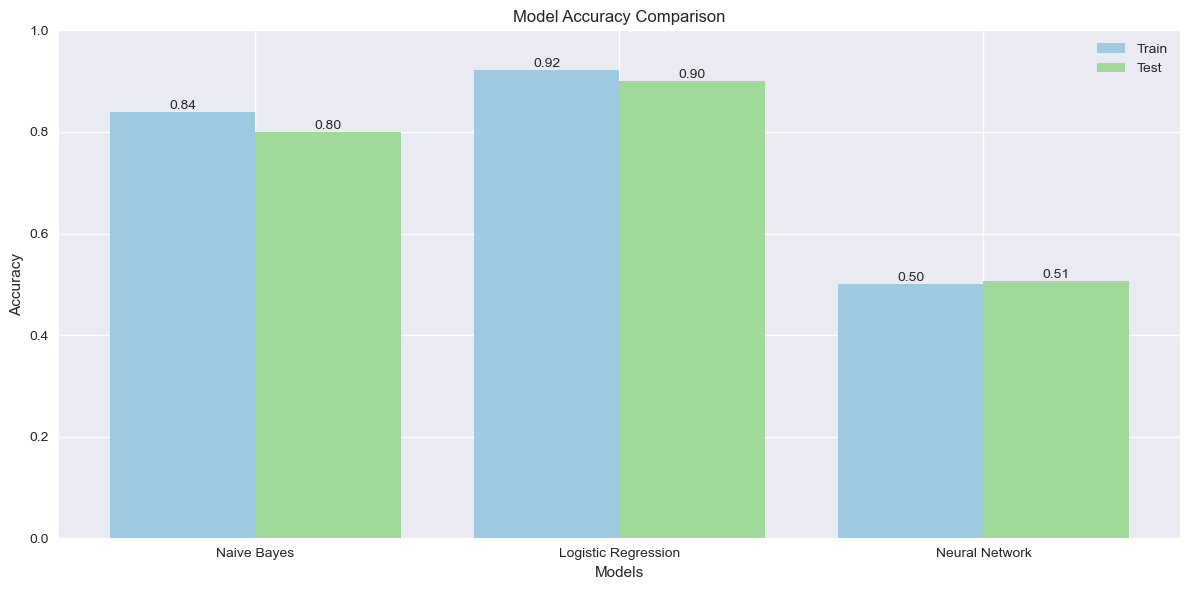

In [20]:
# Set the style to match the graph
plt.style.use('seaborn')
sns.set_palette("pastel")

# Model names and their corresponding accuracies
models = ['Naive Bayes', 'Logistic Regression', 'Neural Network']
train_accuracies = [train_accuracy_nv, train_accuracy_lr, train_accuracy_snn]
test_accuracies = [test_accuracy_nv, test_accuracy_lr, test_accuracy_snn]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Colors matching the provided image
train_color = '#9ecae1'  # Light blue
test_color = '#a1d99b'   # Light green

# Plot train accuracies
ax.bar([i - 0.2 for i in range(len(models))], train_accuracies, 0.4, label='Train', color=train_color)

# Plot test accuracies
ax.bar([i + 0.2 for i in range(len(models))], test_accuracies, 0.4, label='Test', color=test_color)

# Customize the plot
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(range(len(models)))
ax.set_xticklabels(models)
ax.set_ylim(0, 1)  # Set y-axis from 0 to 1 for accuracy scale
ax.legend()

# Add value labels on the bars
for i, v in enumerate(train_accuracies):
    ax.text(i - 0.2, v, f'{v:.2f}', ha='center', va='bottom')
for i, v in enumerate(test_accuracies):
    ax.text(i + 0.2, v, f'{v:.2f}', ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()